In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime

In [390]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [391]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [392]:
df1 = df[['budget','is_sequel','domestic_opening_sales','release_date','top50_d']]

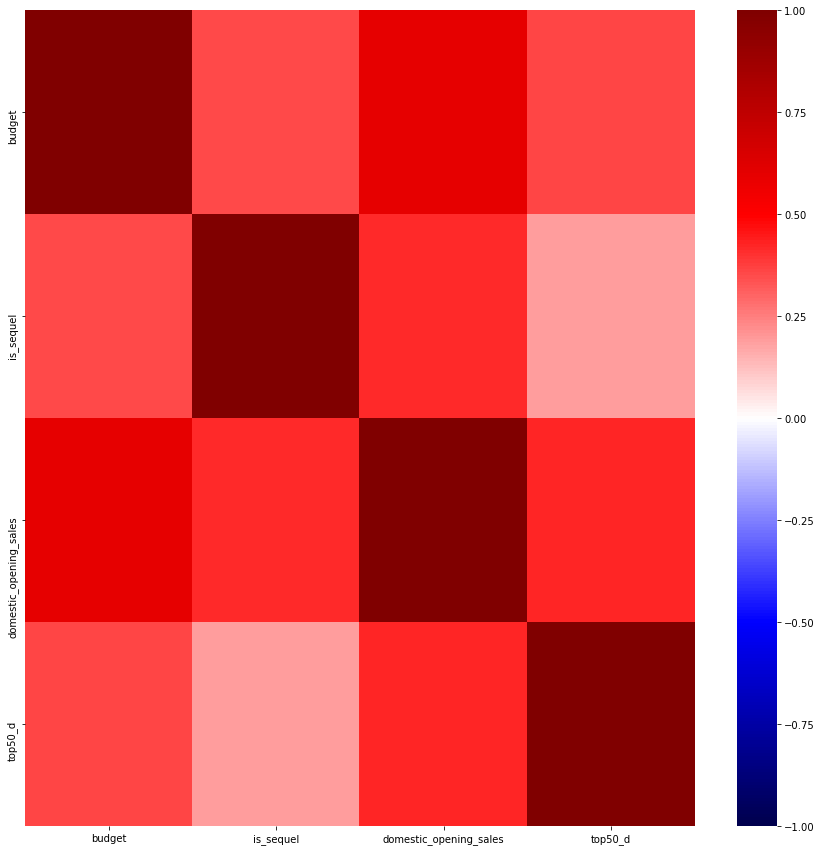

In [393]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-394-c8ef9a649a47>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


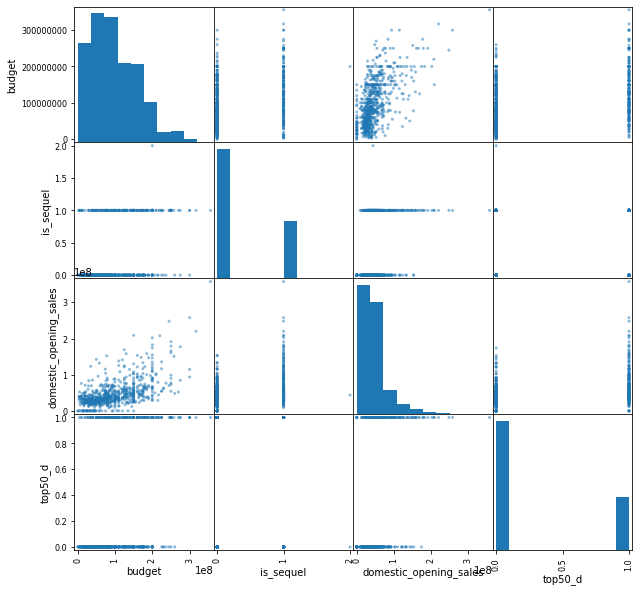

In [394]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

In [409]:
x = df[['budget','dd_top5','is_sequel','rating','month','top50_d','genre_top3']]

y = df['domestic_opening_sales']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=5)
#previous random state 5
#10
#14
#20

In [410]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.25, random_state=10)
#Previous random state 10
#10
#9
#15

Text(0.5, 1.0, 'Budget versus domestic opening sales top movies from 2000 to 2020')

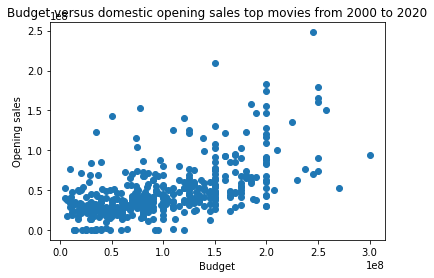

In [397]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = x_train['budget']
sales_y = y_train

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic opening sales top movies from 2000 to 2020')

In [413]:
x_cont_train = x_train[['budget','is_sequel','dd_top5','top50_d','genre_top3']]
x_cont_val = x_val[['budget','is_sequel','dd_top5','top50_d', 'genre_top3']]
x_cont_test = x_test[['budget','is_sequel','dd_top5','top50_d','genre_top3']]

In [414]:
x_cat_train = x_train[['month','rating']]
x_cat_val = x_val[['month','rating']]
x_cat_test = x_test[['month','rating']]

In [415]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(x_cat_train)

ohe_x_train = ohe.transform(x_cat_train)

columns = ohe.get_feature_names(['month','rating'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=x_cat_train.index)

ohe_x_train_df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,rating_PG,rating_PG-13,rating_R
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
254,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [416]:
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(x_cat_val)

ohe_x_val = ohe_v.transform(x_cat_val)

columns_v = ohe_v.get_feature_names(['month','rating'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns_v, index=x_cat_val.index)

ohe_x_val_df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,rating_PG,rating_PG-13,rating_R
96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
377,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [417]:
combo_train_df = pd.concat([x_cont_train, ohe_x_train_df], axis=1)

combo_val_df =  pd.concat([x_cont_val, ohe_x_val_df], axis=1)
combo_val_df.head()

,budget,is_sequel,dd_top5,top50_d,genre_top3,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,rating_PG,rating_PG-13,rating_R
96,60000000,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
377,217000000,1,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
137,90000000,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,220000000,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,160000000,0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [418]:
combo_lr = LinearRegression()

combo_lr.fit(combo_train_df, y_train)

combo_lr.score(combo_val_df, y_val) #R2

y_pred = combo_lr.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

31551804.926635668

In [419]:
combo_lr.score(combo_val_df, y_val) #R2

0.5459838631721586

In [420]:
ohe_t = OneHotEncoder(drop='first', sparse=False)

ohe_t.fit(x_cat_test)

ohe_x_test = ohe_t.transform(x_cat_test)

columns_t = ohe_t.get_feature_names(['month','rating'])

ohe_x_test_df = pd.DataFrame(ohe_x_test, columns=columns_t, index=x_cat_test.index)

ohe_x_test_df.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,rating_PG,rating_PG-13,rating_R
151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
230,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [421]:
combo_test_df = pd.concat([x_cont_test, ohe_x_test_df], axis=1)

In [422]:
combo_lr.score(combo_test_df, y_test) #R2

y_pred = combo_lr.predict(combo_test_df)
np.sqrt(mean_squared_error(y_test, y_pred))

26392679.958338812

In [423]:
combo_lr.score(combo_test_df, y_test) #R2

0.4520583374642687